In [1]:
###################################################################################################################################################################
###################################################################################################################################################################
############################################### PROGRAM TO REVIEW WINE REVIEWS AND GENERATE WORD CLOUDS ###########################################################
###################################################################################################################################################################
###################################################################################################################################################################

In [2]:
##################################################### Start with loading all necessary libraries #################################################################
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [3]:
#################################################################################################################################################################
##################################################### Read the Wine Reviews File ################################################################################
#################################################################################################################################################################

df = pd.read_csv("../data/winemag-data-130k-v2_selectedcountries.csv")
df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108468,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann
108469,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
108470,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
108471,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [4]:
ReviewCountByCountry = pd.DataFrame({'RecordCnt':df.groupby(['country'], dropna=False, observed=True)['description'].count()}).reset_index()
ReviewCountByCountry = ReviewCountByCountry.sort_values(by=['RecordCnt'], ascending=False)
ReviewCountByCountry

,country,RecordCnt
4,US,54504
0,France,22093
1,Italy,19540
3,Spain,6645
2,Portugal,5691


In [5]:
ReviewCountByVariety = pd.DataFrame({'RecordCnt':df.groupby(['variety'], dropna=False, observed=True)['description'].count()}).reset_index()
ReviewCountByVariety = ReviewCountByVariety.sort_values(by=['RecordCnt'], ascending=False)
ReviewCountByVariety

,variety,RecordCnt
350,Pinot Noir,11887
101,Chardonnay,10034
376,Red Blend,7725
61,Cabernet Sauvignon,7572
47,Bordeaux-style Red Blend,6565
...,...,...
223,Malbec Blend,1
224,Malbec-Cabernet Franc,1
225,Malbec-Cabernet Sauvignon,1
434,St. Vincent,1


In [6]:
###############################################################################################################################################################
######################################################## Data Pre-Processing ##################################################################################
###############################################################################################################################################################

import os
import csv
import gc
from pathlib import Path 

import swifter
import re
from bs4 import BeautifulSoup
from html import unescape
import lxml

def remove_urls(x):
    cleaned_string = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', str(x), flags=re.MULTILINE)
    return cleaned_string

def unescape_stuff(x):
    soup = BeautifulSoup(unescape(x), 'lxml')
    return soup.text

def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9]+", ' ', x)
    return cleaned_string 

def unify_whitespaces(x):
    cleaned_string = re.sub(' +', ' ', x)
    return cleaned_string 


C:\Users\madan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
df['text'] = df['description'].str.lower()
df['text'] = df['text'].swifter.apply(remove_urls)
#df['text'] = df['text'].swifter.apply(unescape_stuff)
## Received error in above, so commented it
df['text'] = df['text'].swifter.apply(deEmojify)
df['text'] = df['text'].swifter.apply(remove_symbols)
df['text'] = df['text'].swifter.apply(unify_whitespaces)
df

Pandas Apply: 100%|██████████| 108473/108473 [00:00<00:00, 116955.27it/s]


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,text
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,aromas include tropical fruit broom brimstone ...
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,this is ripe and fruity a wine that is smooth ...
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,tart and snappy the flavors of lime flesh and ...
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,pineapple rind lemon pith and orange blossom s...
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,much like the regular bottling from 2012 this ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108468,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann,while it s rich this beautiful dry wine also o...
108469,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,citation is given as much as a decade of bottl...
108470,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,well drained gravel soil gives this wine its c...
108471,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,a dry style of pinot gris this is crisp with s...


In [8]:
############################################### Remove Stop Words ############################################################################################
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#nltk.download('stopwords') ## -- for first time download

#python -m spacy download en_core_web_sm  ##--for one time download, if needed
sp = spacy.load('en_core_web_sm')

cachedStopWords = sp.Defaults.stop_words
cachedStopWords = [x.lower() for x in cachedStopWords]
cachedStopWords.extend(list(stopwords.words('english')))
cachedStopWords = list(set(cachedStopWords))

############################# Add any additional custom StopWords #################################################################
cachedStopWords.extend(['drink', 'now', 'wine', 'flavor', 'flavors'])
cachedStopWords

['enough',
 'meanwhile',
 'cannot',
 'say',
 'who',
 'where',
 "isn't",
 'beforehand',
 'two',
 'as',
 'else',
 'can',
 'aren',
 'anywhere',
 "hadn't",
 'll',
 'y',
 'are',
 'yet',
 "they've",
 'm',
 'between',
 'itself',
 'keep',
 'amongst',
 'someone',
 "i'll",
 'does',
 'mine',
 'weren',
 'to',
 'other',
 'bottom',
 'each',
 'upon',
 's',
 'made',
 'couldn',
 'seeming',
 '’ve',
 'last',
 'them',
 "i'd",
 'without',
 'has',
 'ma',
 '‘re',
 'go',
 'o',
 "we've",
 'throughout',
 'myself',
 'these',
 'hasn',
 'no',
 '‘ve',
 'beyond',
 'twelve',
 'still',
 'having',
 'if',
 'under',
 'another',
 'move',
 '‘s',
 'seemed',
 'the',
 "weren't",
 'hereby',
 'too',
 "it'd",
 '‘d',
 'whether',
 "she'd",
 'wouldn',
 'my',
 "should've",
 'around',
 'empty',
 'everywhere',
 'ain',
 'would',
 'third',
 'along',
 "we'd",
 'against',
 'whereafter',
 'anything',
 'back',
 "'re",
 "they'd",
 'done',
 'here',
 "they're",
 'part',
 'wherein',
 'anyway',
 "aren't",
 'himself',
 'among',
 'after',
 'down',

In [9]:
def remove_stopwords(x):
    
    meaningful_words = []
    my_list = x
    
    tokenized_my_list = word_tokenize(my_list) 
    meaningful_words = [w for w in tokenized_my_list if not w in cachedStopWords]
        
    return " ".join(meaningful_words)

df['text'] = df['text'].swifter.apply(remove_stopwords)
df

Pandas Apply: 100%|██████████| 108473/108473 [00:15<00:00, 7085.86it/s]


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,text
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,aromas include tropical fruit broom brimstone ...
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,ripe fruity smooth structured firm tannins fil...
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,tart snappy lime flesh rind dominate green pin...
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,pineapple rind lemon pith orange blossom start...
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,like regular bottling 2012 comes rough tannic ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108468,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann,rich beautiful dry offers considerable freshne...
108469,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,citation given decade bottle age prior release...
108470,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,drained gravel soil gives crisp dry character ...
108471,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,dry style pinot gris crisp acidity weight soli...


In [10]:
#################################################################################################################################################################
################################################# Word Cloud for First Review - Example #########################################################################
#################################################################################################################################################################
text = df.text[0]
text

'aromas include tropical fruit broom brimstone dried herb palate overly expressive offering unripened apple citrus dried sage alongside brisk acidity'

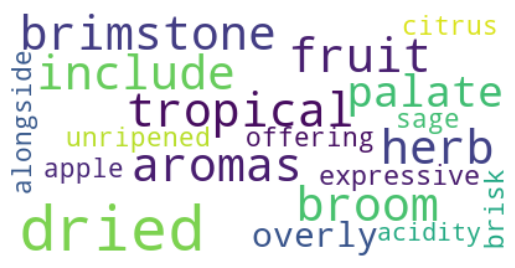

In [11]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [12]:
#################################################################################################################################################################
######################################################## Word Cloud on all reviews ##############################################################################
#################################################################################################################################################################

text = " ".join(review for review in df.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 17282330 words in the combination of all review.


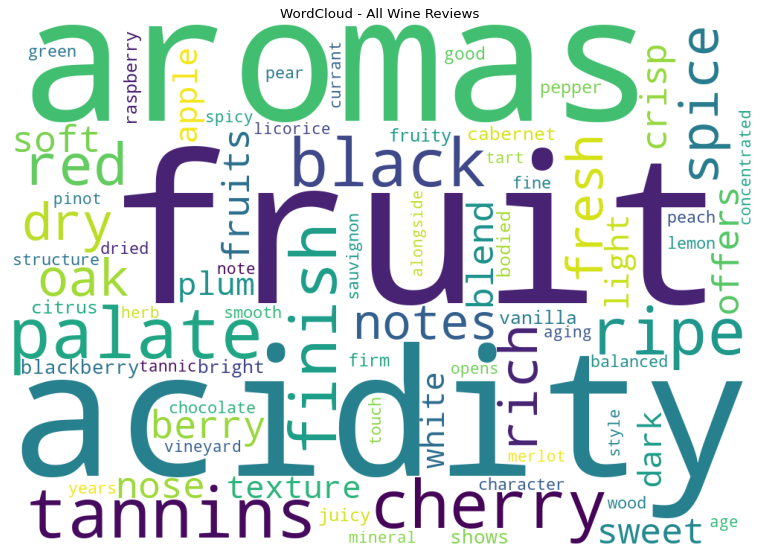

In [13]:
All_reviews_list = df['text'].tolist()
All_reviews = ' '.join(All_reviews_list)

from wordcloud import WordCloud   # for the wordcloud
wordcloud = WordCloud(width = 1000, height = 700, random_state=1, background_color='white', max_words = 75, collocations=False, normalize_plurals=False).generate(All_reviews)

# create the wordcloud
import matplotlib.pyplot as plt   # for wordclouds & charts
from matplotlib.pyplot import figure

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(12, 10), dpi=80)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("WordCloud - All Wine Reviews")
    plt.box(False)
    plt.show()
    plt.close() 
   
#Plot
plot_cloud(wordcloud)

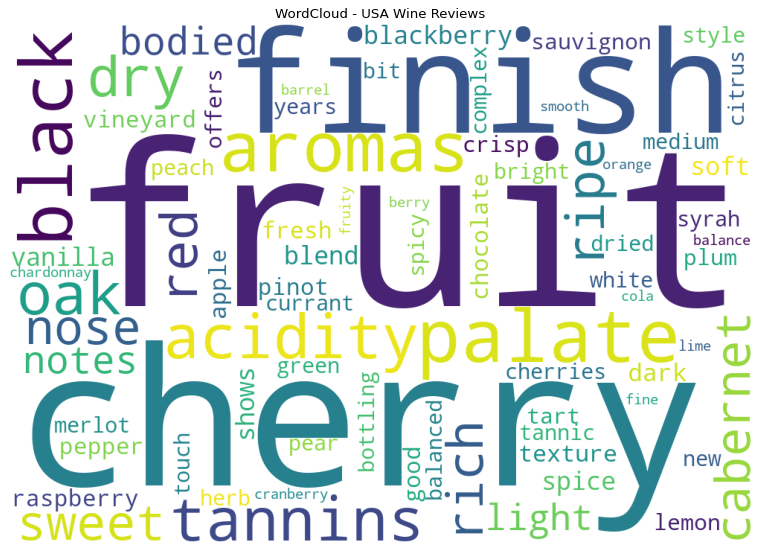

In [14]:
#################################################################################################################################################################
########################################### Generate Word Cloud on USA, France and Italy reviews separately #####################################################
#################################################################################################################################################################

df_USA = df[df["country"]=="US"]
USA_reviews_list = df_USA['text'].tolist()
USA_reviews = ' '.join(USA_reviews_list)

from wordcloud import WordCloud   # for the wordcloud
wordcloud = WordCloud(width = 1000, height = 700, random_state=1, background_color='white', max_words = 75, collocations=False, normalize_plurals=False).generate(USA_reviews)

# create the wordcloud
import matplotlib.pyplot as plt   # for wordclouds & charts
from matplotlib.pyplot import figure

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(12, 10), dpi=80)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("WordCloud - USA Wine Reviews")
    plt.box(False)
    plt.show()
    plt.close() 
   
#Plot
plot_cloud(wordcloud)

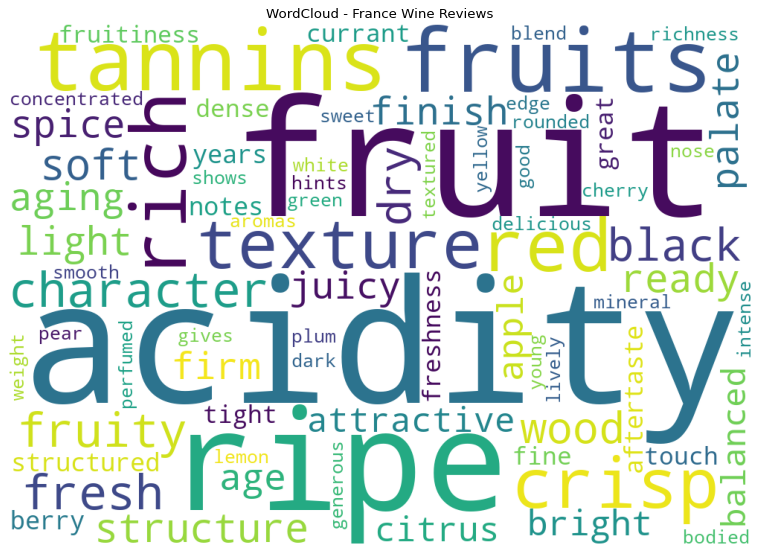

In [15]:
df_France = df[df["country"]=="France"]
France_reviews_list = df_France['text'].tolist()
France_reviews = ' '.join(France_reviews_list)

from wordcloud import WordCloud   # for the wordcloud
wordcloud = WordCloud(width = 1000, height = 700, random_state=1, background_color='white', max_words = 75, collocations=False, normalize_plurals=False).generate(France_reviews)

# create the wordcloud
import matplotlib.pyplot as plt   # for wordclouds & charts
from matplotlib.pyplot import figure

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(12, 10), dpi=80)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("WordCloud - France Wine Reviews")
    plt.box(False)
    plt.show()
    plt.close() 
   
#Plot
plot_cloud(wordcloud)

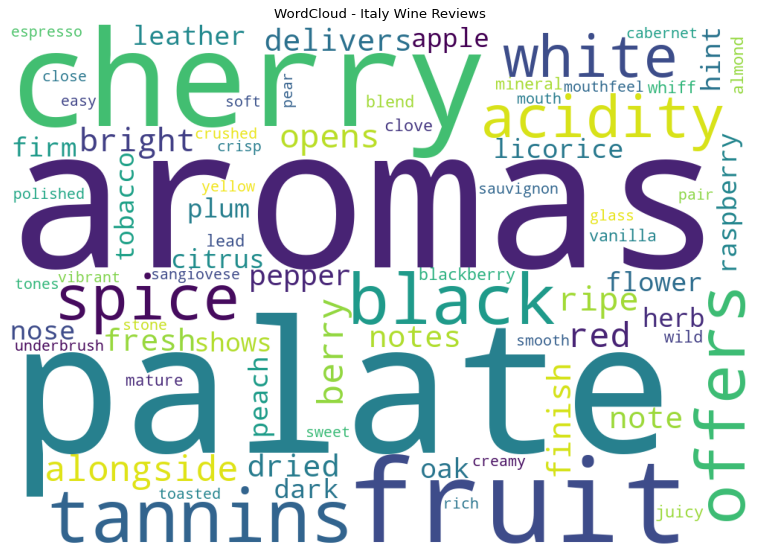

In [16]:
df_Italy = df[df["country"]=="Italy"]
Italy_reviews_list = df_Italy['text'].tolist()
Italy_reviews = ' '.join(Italy_reviews_list)

from wordcloud import WordCloud   # for the wordcloud
wordcloud = WordCloud(width = 1000, height = 700, random_state=1, background_color='white', max_words = 75, collocations=False, normalize_plurals=False).generate(Italy_reviews)

# create the wordcloud
import matplotlib.pyplot as plt   # for wordclouds & charts
from matplotlib.pyplot import figure

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(12, 10), dpi=80)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("WordCloud - Italy Wine Reviews")
    plt.box(False)
    plt.show()
    plt.close() 
   
#Plot
plot_cloud(wordcloud)

In [17]:
#########################################################################################################################################################
############################################### N-Gram Function #########################################################################################
#########################################################################################################################################################

from nltk.tokenize import word_tokenize
from nltk.util import ngrams

def get_ngrams(text, n=2):
    text = str(text)
    n_grams = ngrams(text.split(), n)
    returnVal = []
    
    try:
        for grams in n_grams:
            returnVal.append('_'.join(grams))
    except(RuntimeError):
        pass
        
    return ' '.join(returnVal).strip()

In [18]:
df["bigram_text"] = df["text"].swifter.apply(get_ngrams, n=2)
df["trigram_text"] = df["text"].swifter.apply(get_ngrams, n=3)
df

Pandas Apply: 100%|██████████| 108473/108473 [00:00<00:00, 166698.75it/s]


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,text,bigram_text,trigram_text
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,aromas include tropical fruit broom brimstone ...,aromas_include include_tropical tropical_fruit...,aromas_include_tropical include_tropical_fruit...
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,ripe fruity smooth structured firm tannins fil...,ripe_fruity fruity_smooth smooth_structured st...,ripe_fruity_smooth fruity_smooth_structured sm...
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,tart snappy lime flesh rind dominate green pin...,tart_snappy snappy_lime lime_flesh flesh_rind ...,tart_snappy_lime snappy_lime_flesh lime_flesh_...
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,pineapple rind lemon pith orange blossom start...,pineapple_rind rind_lemon lemon_pith pith_oran...,pineapple_rind_lemon rind_lemon_pith lemon_pit...
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,like regular bottling 2012 comes rough tannic ...,like_regular regular_bottling bottling_2012 20...,like_regular_bottling regular_bottling_2012 bo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108468,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann,rich beautiful dry offers considerable freshne...,rich_beautiful beautiful_dry dry_offers offers...,rich_beautiful_dry beautiful_dry_offers dry_of...
108469,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,citation given decade bottle age prior release...,citation_given given_decade decade_bottle bott...,citation_given_decade given_decade_bottle deca...
108470,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,drained gravel soil gives crisp dry character ...,drained_gravel gravel_soil soil_gives gives_cr...,drained_gravel_soil gravel_soil_gives soil_giv...
108471,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,dry style pinot gris crisp acidity weight soli...,dry_style style_pinot pinot_gris gris_crisp cr...,dry_style_pinot style_pinot_gris pinot_gris_cr...


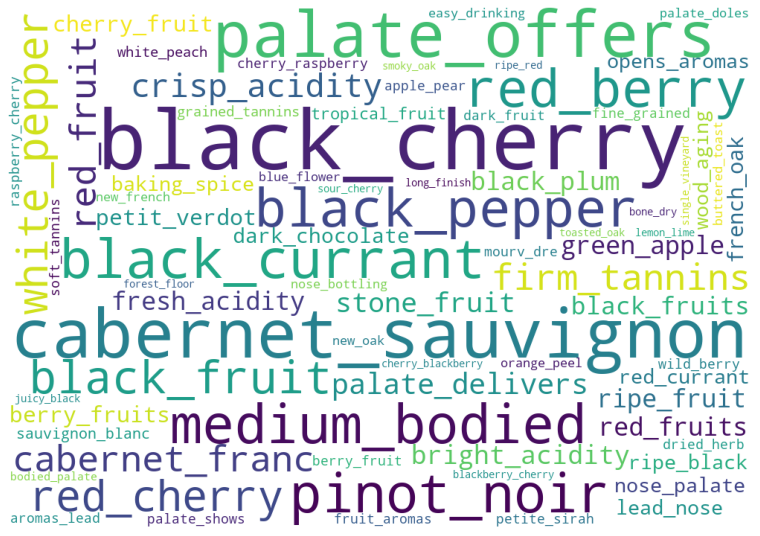

In [19]:
#########################################################################################################################################################
############################################### Plot the Bigram Word Cloud ##############################################################################
#########################################################################################################################################################

tweet_string_list = df['bigram_text'].tolist()
tweet_string = ' '.join(tweet_string_list)

from wordcloud import WordCloud   # for the wordcloud
wordcloud = WordCloud(width = 1000, height = 700, random_state=1, background_color='white', max_words = 75, collocations=False, normalize_plurals=False).generate(tweet_string)

# create the wordcloud
import matplotlib.pyplot as plt   # for wordclouds & charts
from matplotlib.pyplot import figure

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(12, 10), dpi=80)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.box(False)
    plt.show()
    plt.close() 
   
#Plot
plot_cloud(wordcloud)

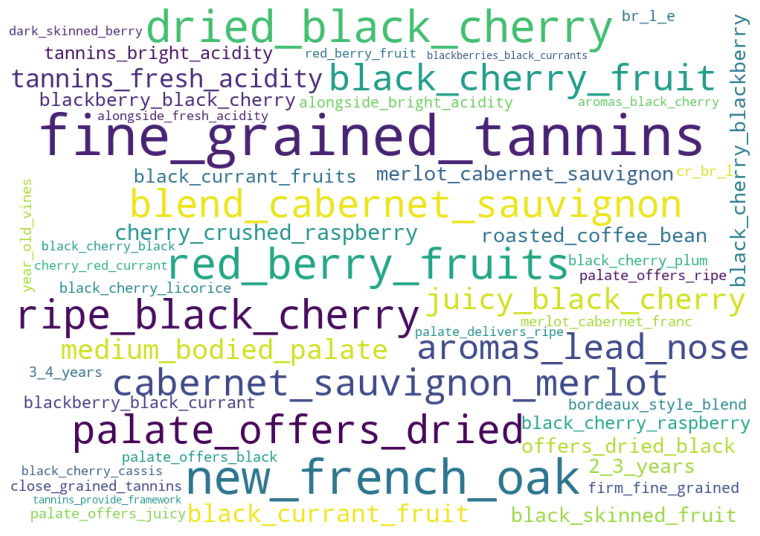

In [20]:
#########################################################################################################################################################
############################################# Plot the Trigram Word Cloud (top 50 Trigrams) #############################################################
#########################################################################################################################################################

tweet_string_list = df['trigram_text'].tolist()
tweet_string = ' '.join(tweet_string_list)

wordcloud = WordCloud(width = 1000, height = 700, random_state=1, background_color='white', max_words = 50, collocations=False, normalize_plurals=False).generate(tweet_string)
plot_cloud(wordcloud)